# Titanic Veri Seti


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("C:/Users/HP/traintıtanıc.csv")
data=df.copy()

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* survived : hayatta kalma durumu (0 = olmus, 1=hayatta)
* pclass : Bilet sınıfı (1= iyi , 2=orta, 3= normal)
* name : yolcu isimleri
* sex : cinsiyet (F, M)
* age : yas
* sibsp : gemideki  kardes/es sayısı
* parch : ebevyn/cocuk sayısı 
* ticket : bilet numarası
* fare : yolcu ücreti
* Cabin : kabin no 
* Embarked : gemi limanları (C = Cherbourg, Q = Queenstown, S = Southampton)

Veride eksik değerler olduğu görülmekte ayrıca bazı degiskenlerin araştırmanın doğrultusunda olmadığı ve sibsp ve parch değişkenlerinin
aynı durumu anlattığı, değişken açıklamalarından anlaşılmakta bu yüzden bu iki değişken arasında ilişki olabileceğini düşünüyorum.


In [4]:
data.shape #891 gözlem birimi, 12 degısken

(891, 12)

In [5]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
data = data.astype({"Survived": "category", "Pclass": "object"})
data = data.astype({"Name": "category", "Sex": "category"})
data = data.astype({"Ticket": "category", "Cabin":"category"})
data = data.astype({"Embarked": "category"})

In [7]:
data.dtypes

PassengerId       int64
Survived       category
Pclass           object
Name           category
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket         category
Fare            float64
Cabin          category
Embarked       category
dtype: object

# Gereksiz Degısken Cıkarımı

In [8]:
data.drop("PassengerId", axis=1, inplace=True)

In [9]:
data.drop("Name", axis=1, inplace=True)

In [10]:
data.drop("Ticket", axis=1, inplace=True)

In [11]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [12]:
data.dtypes

Survived    category
Pclass        object
Sex         category
Age          float64
SibSp          int64
Parch          int64
Fare         float64
Cabin       category
Embarked    category
dtype: object

In [13]:
data.corr()

,Age,SibSp,Parch,Fare
Age,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.308247,1.000000,0.414838,0.159651
Parch,-0.189119,0.414838,1.000000,0.216225
Fare,0.096067,0.159651,0.216225,1.000000


In [14]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [15]:
data["WıthFamıly"] = data["SibSp"] + data["Parch"]

In [16]:
data["WıthFamıly"].values > 0

array([ True,  True, False,  True, False, False, False,  True,  True,
        True,  True, False, False,  True, False, False,  True, False,
        True, False, False, False, False, False,  True,  True, False,
        True, False, False, False,  True, False, False,  True,  True,
       False, False,  True,  True,  True,  True, False,  True, False,
       False,  True, False,  True,  True,  True, False,  True,  True,
        True, False, False, False,  True,  True, False, False,  True,
        True, False,  True, False, False,  True,  True, False,  True,
       False,  True, False, False, False, False,  True, False, False,
       False, False, False, False,  True,  True, False,  True, False,
       False, False,  True,  True, False, False, False,  True,  True,
        True, False, False,  True, False,  True, False, False, False,
       False,  True, False,  True, False,  True, False, False, False,
        True,  True,  True,  True, False,  True, False,  True,  True,
       False, False,

In [17]:
data["WıthFamıly"]=data["WıthFamıly"].values > 0

In [18]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,WıthFamıly
0,0,3,male,22.0,1,0,7.2500,NaN,S,True
1,1,1,female,38.0,1,0,71.2833,C85,C,True
2,1,3,female,26.0,0,0,7.9250,NaN,S,False
3,1,1,female,35.0,1,0,53.1000,C123,S,True
4,0,3,male,35.0,0,0,8.0500,NaN,S,False


* Çoklu regresyon varsayımına göre bağımsız değişkenlerin arasında ilişkinin olmaması gerekmektedir. Çünkü Doğrusal bağlantı sorunu doğurmaktadır.
* Bu durum değişkenlerin arasındaki ilişkilerin aynı bilgileri taşıdığını ve modelde istenilen sonuca bizi ulaştırmayacaktır.
* Korelasyon tablosu incelendiğinde karşımıza Tam olmayan çoklu doğrusal bağlantı sorunu çıkmaktadır. 
* Bu duruma çözüm olarak WıthFamıly adında iki değişkeni birleştirerek aynı doğrultuda bir değişken oluşturdum.

* Ebevynin(Parch) ve çocukların sayısı(SibSp) değişkenlerinin toplamı 0 dan büyükse True, yoksa False olarak bu iki ilişkili değişkeni WıthFamıly adında bir değişkene dönüştürdüm. 

In [19]:
data = data.astype({"WıthFamıly": "category"})#Kategoriklestirdik tipini

In [20]:
data.drop("SibSp" ,axis=1, inplace=True)


In [21]:
data.drop("Parch" ,axis=1, inplace=True)

# Eksik Deger İnceleme

In [22]:
data.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age           177
Fare            0
Cabin         687
Embarked        2
WıthFamıly      0
dtype: int64

* Age, Cabin ve Embarked değişkenlerinde kayıp gözlem birimlerinin bulunduğu görülmekte.

## Age Degıskeni

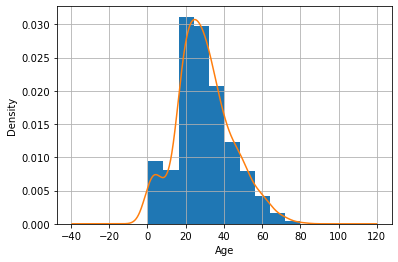

In [23]:
data['Age'].hist(density=True)
data['Age'].plot(kind='density')
plt.xlabel('Age')
plt.grid()
plt.show()

* Age değişkeni sağa kuyruk vermiş normal dağılım teorisinden kaynaklı burada median esas alınarak doldurma yapacağım.
 

In [24]:
data["Age"].median()

28.0

In [25]:
data["Age"].isnull().sum()/len(data["Age"])

0.19865319865319866

* Yaklaşık 20 oranında eksik değerlerimiz var ve tamamen raslantısal kayıp.

In [26]:
data.describe() 

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [27]:
data["Age"].fillna(data["Age"].median(skipna=True), inplace=True) #Kayıp gözlem birimleri dolduruldu.

## Cabin Degiskeni

* Kategorik Degısken

In [28]:
data["Cabin"].isnull().sum()/len(data["Cabin"])

0.7710437710437711

In [29]:
data.drop("Cabin", axis=1, inplace=True)

* Cabin degiskeninde yüksek oranda kayıp gözükmekte bu yüzden veri setinden silindi. 

## Embarked Degiskeni

* 2 eksik değerimiz vardı.
* Kategorik degisken


In [30]:
data["Embarked"].isnull().sum()

2

In [31]:
data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

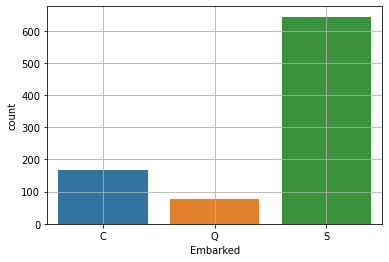

In [32]:
sns.countplot(x='Embarked', data=data)
plt.grid()


In [33]:
data["Embarked"].fillna(data["Embarked"].value_counts().idxmax(), inplace=True)

In [34]:
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,WıthFamıly
0,0,3,male,22.0,7.2500,S,True
1,1,1,female,38.0,71.2833,C,True
2,1,3,female,26.0,7.9250,S,False
3,1,1,female,35.0,53.1000,S,True
4,0,3,male,35.0,8.0500,S,False


In [35]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
Fare          0
Embarked      0
WıthFamıly    0
dtype: int64

# Keşifci Veri Analizi

## Tek Değişken Analizi

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'WıthFamıly'}, xlabel='WıthFamıly', ylabel='count'>

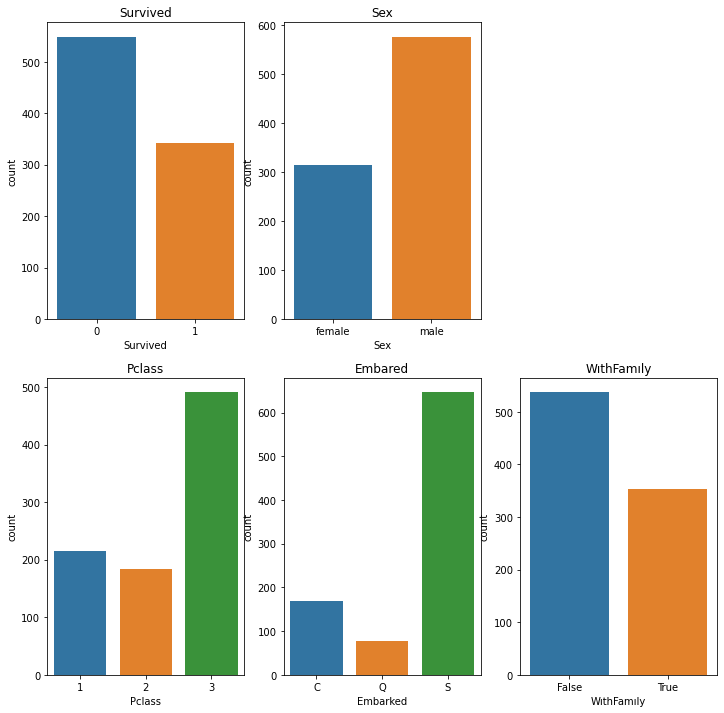

In [36]:
#Kategorıkler

fig = plt.figure(figsize=(12,12))

plt.subplot(2,3,1)
plt.title('Survived')
sns.countplot(data.Survived)


plt.subplot(2,3,2)
plt.title('Sex')
sns.countplot(data.Sex)

plt.subplot(2,3,4)
plt.title('Pclass')
sns.countplot(data.Pclass)


plt.subplot(2,3,5)
plt.title('Embared')
sns.countplot(data.Embarked)

plt.subplot(2,3,6)
plt.title('WıthFamıly')
sns.countplot(data.WıthFamıly)

* Bağımlı değişkenimiz Survived değiskenindeki gemide %44 oranında hayatta kalanların olduğunu ayrıca 
* sınıfların frekans dağılım oranı dengeli olduğundan accuracy scoruna güvenilebilir olduğunu açıklamaktadır.

* Gemide kadın erkek cinsiyet oranlarında erkeğin gemide daha çoğunlukta olduğu görülmektedir.

* Yolcuların seyahat sınıflarında en çok 3 numaralı normal tarifeyi seçtiği görülmektedir.

* Gemiye binen yolcuların en çok Southampton limanından bindiği görülmüştür.

* WıthFamıly değişkeninde yalnız seyahat yapanların daha çok olduğu görülmektedir.

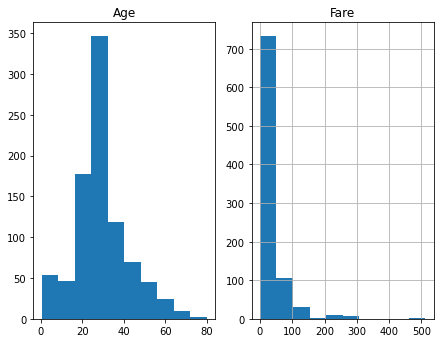

In [37]:
#Numerıcler

fig=plt.figure(figsize=(15,12))
plt.subplot(2,4,1)
plt.hist(data.Age)
plt.title("Age")

plt.subplot(2,4,2)
plt.hist(data.Fare)
plt.title("Fare")

plt.grid()

* Yaş dağılımının 0-50 yaş aralığında dağıldığı yoğun dağılımın 20-35 yaşları arasında olduğu görülmektedir.

* Yolcu ücretlerinin 0-100 arasında yoğun olduğu ayrıca aykırı değerlerin bulunduğu görülmektedir.




## İkili Analizler

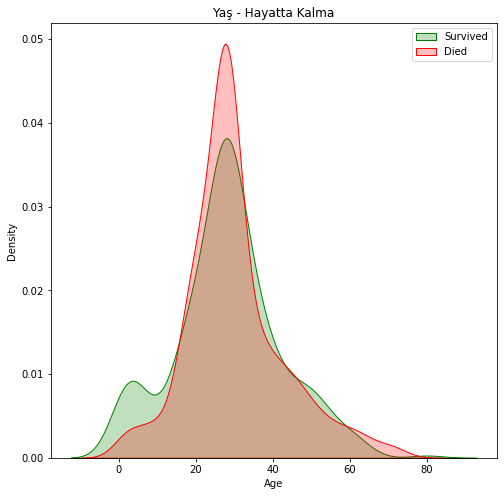

In [38]:
plt.figure(figsize=(8,8))
ax = sns.kdeplot(data["Age"][data.Survived == 1], color="green", shade=True)
sns.kdeplot(data["Age"][data.Survived == 0], color="red", shade=True)

plt.legend(['Survived', 'Died'])
plt.title('Yaş - Hayatta Kalma')
plt.xlabel('Age')
plt.show()

* Grafiğe bakıldığında erken yaşlarda olanların hayatta kalma oranlarının fazla olduğu görülmekte.


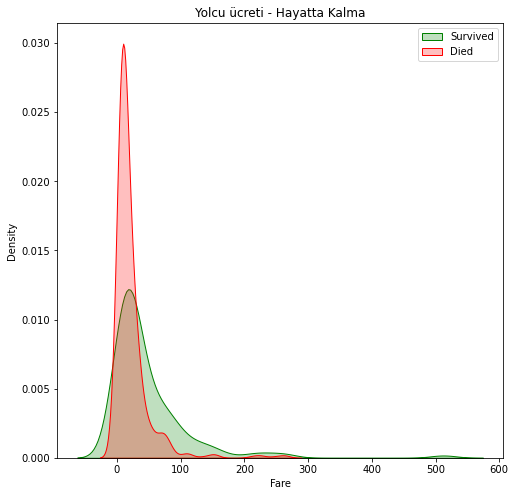

In [39]:
plt.figure(figsize=(8,8))
ax = sns.kdeplot(data["Fare"][data.Survived == 1], color="green",shade=True)
sns.kdeplot(data["Fare"][data.Survived == 0], color="red", shade=True)

plt.legend(['Survived', 'Died'])
plt.title('Yolcu ücreti - Hayatta Kalma')
plt.xlabel('Fare')
plt.show()


* Ücreti yüksek ödeyennlerin hayatta kalma oranlarının yüksek olduğunu görmekteyiz 

In [40]:
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,WıthFamıly
0,0,3,male,22.0,7.2500,S,True
1,1,1,female,38.0,71.2833,C,True
2,1,3,female,26.0,7.9250,S,False
3,1,1,female,35.0,53.1000,S,True
4,0,3,male,35.0,8.0500,S,False


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Pclass', ylabel='count'>

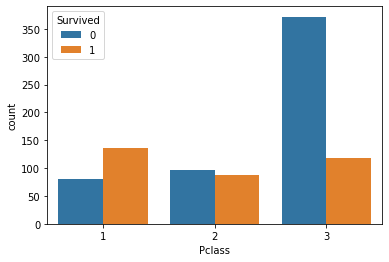

In [41]:
sns.countplot("Pclass",hue="Survived", data=data)

* Yolcu sınıfı 3 olanların (normal) ölü olmalarının oranının yüksek olduğunu söyleyebiliriz. 
* Ek olarak yolcu sınıfı 1 olanların hayatta kalma olasılıkları diğer sınıflara göre daha fazla olduğu görülmekte. 

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


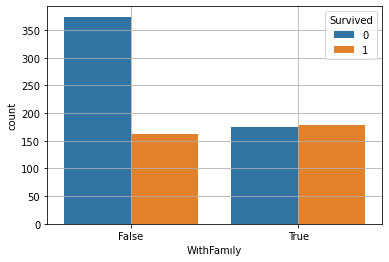

In [42]:
sns.countplot("WıthFamıly",hue="Survived", data=data)
plt.grid()

* Yalnız seyahat edenlerin ölüm oranları daha fazla olduğu gözükmekte. 

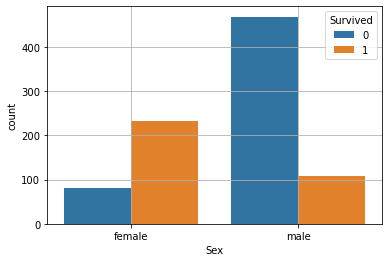

In [43]:
sns.countplot("Sex",hue="Survived", data=data)
plt.grid()

* Yukarıdaki grafiğe göre kadınların daha çok önemsendiğini daha çok hayatta kalma oranlarından anlaşılabilir.

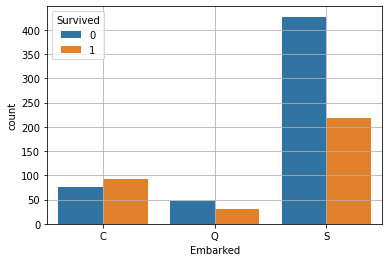

In [44]:
sns.countplot("Embarked",hue="Survived", data=data)
plt.grid()

* Yolcuların bindiği limanlardan en çok ölenlerin Southampton limanından olduğu görülmektedir.

# Kategorik Değiskenler

* Kategorik değişkenlere one-hot dummy dönüşümü uygulayalım.

In [45]:
data1=pd.get_dummies(data, columns=["Pclass","Embarked","Sex","WıthFamıly"], drop_first=True)

In [46]:
data1.head(5)

,Survived,Age,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male,WıthFamıly_True
0,0,22.0,7.2500,0,1,0,1,1,1
1,1,38.0,71.2833,0,0,0,0,0,1
2,1,26.0,7.9250,0,1,0,1,0,0
3,1,35.0,53.1000,0,0,0,1,0,1
4,0,35.0,8.0500,0,1,0,1,1,0


# Değişken Ölçeklendirme

In [47]:
y=data1["Survived"]

In [48]:
data1.drop("Survived", axis=1,inplace=True)

In [49]:
from sklearn.preprocessing import MinMaxScaler

In [50]:
scaler = MinMaxScaler()
data2 = scaler.fit_transform(data1)

In [51]:
type(data2)

numpy.ndarray

In [52]:
col=data1.columns

In [53]:
data3=pd.DataFrame(data2,columns=col)

In [54]:
data3

,Age,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male,WıthFamıly_True
0,0.271174,0.014151,0.0,1.0,0.0,1.0,1.0,1.0
1,0.472229,0.139136,0.0,0.0,0.0,0.0,0.0,1.0
2,0.321438,0.015469,0.0,1.0,0.0,1.0,0.0,0.0
3,0.434531,0.103644,0.0,0.0,0.0,1.0,0.0,1.0
4,0.434531,0.015713,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...
886,0.334004,0.025374,1.0,0.0,0.0,1.0,1.0,0.0
887,0.233476,0.058556,0.0,0.0,0.0,1.0,0.0,0.0
888,0.346569,0.045771,0.0,1.0,0.0,1.0,0.0,1.0
889,0.321438,0.058556,0.0,0.0,0.0,0.0,1.0,0.0


In [55]:
data1.head()

,Age,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male,WıthFamıly_True
0,22.0,7.2500,0,1,0,1,1,1
1,38.0,71.2833,0,0,0,0,0,1
2,26.0,7.9250,0,1,0,1,0,0
3,35.0,53.1000,0,0,0,1,0,1
4,35.0,8.0500,0,1,0,1,1,0


# Train-Test Split

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(data3, y, test_size=0.33, random_state=2)

In [58]:
X_train.shape

(596, 8)

In [59]:
X_test.shape

(295, 8)

In [60]:
y_train.shape

(596,)

In [61]:
y_test.shape

(295,)

# Model GBM

Hyperparametreler;

**loss**, Optimize edilecek kayıp fonksiyonu.

**Max_dept**, kurulacak ağacın derinliğini limitlemek için kullanılır. Aşırı öğrenmeden kaçınmak için optimum seviyeye getirilmelidir. Çok dallanma aşırı öğrenmeye, az dallanma eksik öğrenmeye sebep olacaktır.

**n_estimators**, Sığacak güçlendirilmiş ağaç sayısı

**Learning_rate**, kurulan ağaçları ölçeklendirmek için 0-1 arasında verilen bir değerdir. Bu değerin küçük olması daha iyi tahmin gücüne yardımcı olacaktır. Ancak öğrenim süresini arttıracak ve aşırı öğrenme ihtimalini arttıracaktır.

**Subsample**, her iterasyonda tarancak gözlem birimi sayısıdır.

**criterion**, Bir bölünmenin kalitesini ölçme işlevi.


In [62]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier

In [63]:
gbm = GradientBoostingClassifier()

In [64]:
gbm?

Type:        GradientBoostingClassifier
String form: GradientBoostingClassifier()
File:        c:\users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py
Docstring:  
Gradient Boosting for classification.

GB builds an additive model in a
forward stage-wise fashion; it allows for the optimization of
arbitrary differentiable loss functions. In each stage ``n_classes_``
regression trees are fit on the negative gradient of the
binomial or multinomial deviance loss function. Binary classification
is a special case where only a single regression tree is induced.

Read more in the :ref:`User Guide <gradient_boosting>`.

Parameters
----------
loss : {'deviance', 'exponential'}, default='deviance'
    The loss function to be optimized. 'deviance' refers to
    deviance (= logistic regression) for classification
    with probabilistic outputs. For loss 'exponential' gradient
    boosting recovers the AdaBoost algorithm.

learning_rate : float, default=0.1
    Learning rate shrinks the cont

In [65]:
gbm_params = {"loss":['deviance'],
              "learning_rate": [0.01,0.03,0.05],
              "n_estimators": [200, 500],
              "max_depth":[3,5,7],
              "subsample":[0.6,0.8,1.0],
              "criterion":['squared_error']}

In [66]:
gbm_cv_model= GridSearchCV(gbm, gbm_params, 
                           cv = 10, 
                           verbose = 1).fit(X_train, y_train)

Fitting 10 folds for each of 54 candidates, totalling 540 fits


In [104]:
gbm.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [67]:
gbm_cv_model.best_params_

{'criterion': 'squared_error',
 'learning_rate': 0.05,
 'loss': 'deviance',
 'max_depth': 3,
 'n_estimators': 200,
 'subsample': 0.6}

In [68]:
gbm_cv_model.best_score_

0.8505367231638419

In [69]:
gbm_tuned = GradientBoostingClassifier(criterion='squared_error',
                                       learning_rate = 0.05,
                                       max_depth = 3, 
                                       n_estimators = 200,
                                       subsample=0.6,
                                       random_state=35).fit(X_train, y_train)

In [70]:
y_pred = gbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7932203389830509

In [71]:
pd.concat((pd.DataFrame(X_train.columns, columns = ['feature']), 
           pd.DataFrame(gbm_tuned.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)

,feature,importance
6,Sex_male,0.347443
1,Fare,0.262653
0,Age,0.234541
3,Pclass_3,0.101839
5,Embarked_S,0.022394
4,Embarked_Q,0.014008
7,WıthFamıly_True,0.009444
2,Pclass_2,0.007678


In [72]:
print(classification_report(y_test,y_pred)) 

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       175
           1       0.82      0.62      0.71       120

    accuracy                           0.79       295
   macro avg       0.80      0.77      0.77       295
weighted avg       0.80      0.79      0.79       295

